

*   In this project, we utilize a Kaggle dataset containing text commentaries from numerous games in different leagues across Europe.
*   As doc2vec is designed for large data analysis, it should be trained on large corpora in order to get effective results. Therefore, we used a doc2vec model that was pre-trained on a collection of Wikipedia articles that it got from the English Wikipedia database dump using the WikiExtractor code.
*   Our hypothesis is that our CNN model to which doc2vec embeddings are fed is able to learn a labeling process describing the game scenarios associated with each commentary.  






In [ ]:
#python example to train doc2vec model (with or without pre-trained word embeddings)

import gensim.models as g
import logging
import numpy as np

#python example to infer document vectors from trained doc2vec model
import gensim.models as g
import codecs


#doc2vec parameters
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 1 #number of parallel processes

#pretrained word embeddings
pretrained_emb = "pretrained_word_embeddings.txt" #None if use without pretrained embeddings

#input corpus
train_corpus = "train_docs.txt"

#output model
saved_path = "model.bin"

#enable logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#train doc2vec model
docs = g.doc2vec.TaggedLineDocument(train_corpus)
model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)

#save model
model.save(saved_path)



#parameters
model="model.bin"
test_docs="test_docs.txt"
output_file="test_vectors.txt"

#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

#load model
m = g.Doc2Vec.load(model)
test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines() ]

#infer test vectors
output = open(output_file, "w")
for d in test_docs:
    output.write( " ".join([str(x) for x in m.infer_vector(d, alpha=start_alpha, steps=infer_epoch)]) + "\n" )
output.flush()
output.close()


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2019-05-11 18:00:41,652 : INFO : collecting all words and their counts
2019-05-11 18:00:41,653 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-11 18:00:41,655 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-05-11 18:00:41,689 : INFO : collected 11097 word types and 1000 unique tags from a corpus of 1000 examples and 84408 words
2019-05-11 18:00:41,691 : INFO : Loading a fresh vocabul

[-7.88205191e-02  5.83500527e-02  2.70434562e-02 -9.86359939e-02
  5.51682487e-02 -2.88742166e-02 -1.22642621e-01 -3.64665203e-02
  5.52013889e-03 -9.25061107e-02 -1.21986993e-01  3.99412541e-03
  3.46492194e-02  1.13721110e-01 -4.01580893e-02  7.97128528e-02
 -4.46240827e-02 -3.12368516e-02  6.56507909e-02 -3.16853039e-02
 -3.83919328e-02 -2.88987290e-02 -2.34654117e-02 -7.18556419e-02
 -7.99136609e-02  3.99276279e-02 -1.23514310e-01  3.03583834e-02
  8.86305124e-02 -5.66581674e-02 -1.41138760e-02  8.59204382e-02
  1.69324018e-02  2.27514431e-02  2.08802056e-02  2.42685024e-02
  4.81357016e-02 -6.01573922e-02 -1.03716236e-02  1.00585341e-01
  1.80755761e-02 -5.15080877e-02  2.49986760e-02 -5.36708124e-02
 -1.53879570e-02  7.53776878e-02  6.84149414e-02 -2.23178901e-02
 -2.62709223e-02 -6.93987235e-02  6.91040233e-02  7.25603383e-03
  4.68301187e-05  1.07919388e-01 -3.02679520e-02  5.51244020e-02
  1.13581084e-02 -7.76174441e-02  1.61597449e-02 -3.58264074e-02
  3.35082002e-02  3.86009

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import keras.layers as layers
from keras.models import Model
from keras import backend as K
from sklearn import preprocessing
import keras

df_1 = pd.read_csv('Parenth_Filtered.csv')
print(df_1.head())


df = pd.DataFrame(df_1, columns=['text','assist_method','location','shot_outcome'])
df.shape

W0511 18:02:12.740387 140590475106176 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
Using TensorFlow backend.


   Unnamed: 0   ﻿                                               text  \
0           0   0  Attempt missed. Mladen Petric  left footed sho...   
1           1  11  Attempt missed. Shinji Kagawa  right footed sh...   
2           2  13  Goal!  Borussia Dortmund 1, Hamburg 0. Kevin G...   
3           3  14  Attempt blocked. Mats Hummels  right footed sh...   
4           4  17  Attempt blocked. Tomas Rincon  right footed sh...   

   event_type         event_team  shot_outcome  location  assist_method  \
0           1         Hamburg SV           2.0       9.0              1   
1           1  Borussia Dortmund           2.0      15.0              1   
2           1  Borussia Dortmund           1.0       9.0              1   
3           1  Borussia Dortmund           3.0      15.0              0   
4           1         Hamburg SV           3.0      15.0              0   

   situation  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  


(228498, 4)

In [ ]:
df = df[df['location'] != 19]
df = df[df['location'] != 18]


df= df[df['location'] != 13] #6661
df= df[df['location'] != 10] #3492
df= df[df['location'] != 12] #3426

df= df[df['location'] != 14] #2596
df= df[df['location'] != 8] #2458
df= df[df['location'] != 16] #1991
df= df[df['location'] != 17] #1978
df= df[df['location'] != 6] #1517
df= df[df['assist_method'] != 3]
df= df[df['assist_method'] != 4]
df= df[df['shot_outcome'] != 4]
p15= df[df['location'] == 15] #93667
p3= df[df['location'] == 3] #69606
p9= df[df['location'] == 9] #19033
p11= df[df['location'] == 11] #18441

df_newl5 = pd.DataFrame(p15.sample(2000) , columns=['text','assist_method','location','shot_outcome'])
df_newl3 = pd.DataFrame(p3.sample(2000) , columns=['text','assist_method','location','shot_outcome'])
df_newl9 = pd.DataFrame(p9.sample(1500) , columns=['text','assist_method','location','shot_outcome'])
df_newl11 = pd.DataFrame(p11.sample(1500) , columns=['text','assist_method','location','shot_outcome'])

ali_l1=pd.DataFrame(np.concatenate((df_newl5, df_newl3), axis=0) , columns=['text','assist_method','location','shot_outcome'])
ali_l2=pd.DataFrame(np.concatenate((ali_l1, df_newl9), axis=0) , columns=['text','assist_method','location','shot_outcome'])
ali_l3=pd.DataFrame(np.concatenate((ali_l2, df_newl11), axis=0) , columns=['text','assist_method','location','shot_outcome'])
counter_nassist = ali_l3[ali_l3['assist_method'] == 0]  
counter_nassist1 = ali_l3[ali_l3['assist_method'] == 1] 
counter_nassist2 = ali_l3[ali_l3['assist_method'] == 2] 

hariri=ali_l3.sort_values(['assist_method'],ascending=False)
hariri['assist_method']=hariri['assist_method'].replace(1,9)


hariri=hariri.sort_values(['assist_method'],ascending=False)


hariri = hariri.iloc[1800:]
hariri['assist_method']=hariri['assist_method'].replace(9,1)
counter_nassist = hariri[hariri['assist_method'] == 0]  
counter_nassist1 = hariri[hariri['assist_method'] == 1] 
counter_nassist2 = hariri[hariri['assist_method'] == 2] 

count_loc= hariri[hariri['location'] == 15] #93667
count_loc1= hariri[hariri['location'] == 3] #69606
count_loc2= hariri[hariri['location'] == 9] #19033


In [ ]:
hariri.shape

(5200, 4)

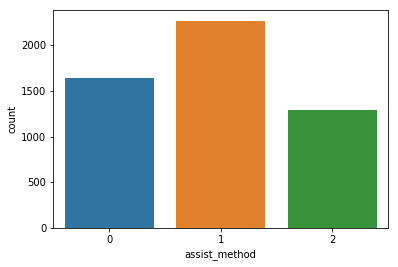

In [ ]:

sns.countplot(hariri.assist_method)


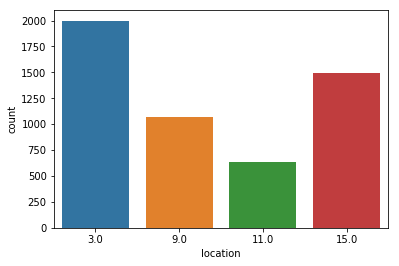

In [ ]:
sns.countplot(hariri.location)

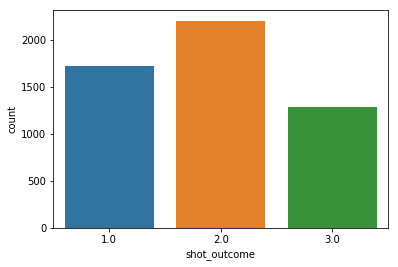

In [ ]:
sns.countplot(hariri.shot_outcome)

In [ ]:

#hariri=hariri.sample(9000)

In [ ]:
hariri.shape

(5200, 4)

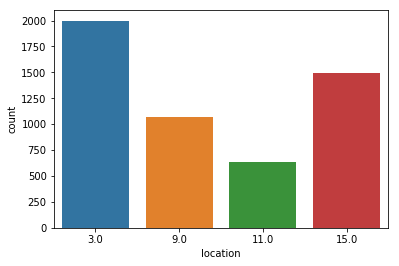

In [ ]:

#sns.countplot(hariri.assist_method)
sns.countplot(hariri.location)

In [ ]:
def envec(x):
    env=m.infer_vector(doc_words=str(x),alpha=0.0005, steps=5)
    return env
    
emat=[]
emat_label=[]
num=1
for i in range (len(hariri)):
    emat.append([envec(hariri.iloc[i,0]),envec(hariri.iloc[i,1]),envec(hariri.iloc[i,2]),envec(hariri.iloc[i,3])])
    emat_label.append(num)



In [ ]:
from sklearn.utils import shuffle
shuf=shuffle(hariri.iloc[:,1:])
shuf2=shuf.head(4000)  

In [ ]:
shuf2

,assist_method,location,shot_outcome
1478,0,15,2
1927,1,15,2
4555,1,9,3
5403,0,9,2
5887,0,11,1
4652,1,9,1
1116,0,15,1
560,0,15,3
5394,1,9,3
5316,1,9,3


In [ ]:
emat_wrong=[]
emat_wrong_label=[]
num2=0
for i in range (len(shuf2)):
    emat_wrong.append([envec(hariri.iloc[i,0]),envec(shuf2.iloc[i,0]),envec(shuf2.iloc[i,1]),envec(shuf2.iloc[i,2])])
    emat_wrong_label.append(num2)


In [ ]:

comat=np.vstack((emat,emat_wrong))  
comat_label=np.concatenate((emat_label,emat_wrong_label),axis=0)

In [ ]:
comat.shape[2]

300

In [ ]:


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.layers import Input, Lambda, Dense
  
#comat_label.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(comat,comat_label,test_size=0.15)
Y_train.reshape(-1,1)
Y_test.reshape(-1,1)

from keras.optimizers import RMSprop
model = Sequential()
model.add(Conv1D(256,
                 2,input_shape=(4,300),
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(128,
                 1,
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(64,
                 1,
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()

#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


W0511 18:02:24.784805 140590475106176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0511 18:02:24.811385 140590475106176 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 256)            153856    
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 256)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 128)            32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
__________

W0511 18:02:25.032080 140590475106176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 6256 samples, validate on 1564 samples
Epoch 1/90
6256/6256 [==============================] - 2s 378us/step - loss: 0.6867 - acc: 0.5614 - val_loss: 0.6854 - val_acc: 0.5665
Epoch 2/90
6256/6256 [==============================] - 2s 319us/step - loss: 0.6862 - acc: 0.5611 - val_loss: 0.6859 - val_acc: 0.5665
Epoch 3/90
6256/6256 [==============================] - 2s 316us/step - loss: 0.6868 - acc: 0.5622 - val_loss: 0.6854 - val_acc: 0.5665
Epoch 4/90
6256/6256 [==============================] - 2s 317us/step - loss: 0.6868 - acc: 0.5627 - val_loss: 0.6848 - val_acc: 0.5665
Epoch 5/90
6256/6256 [==============================] - 2s 315us/step - loss: 0.6865 - acc: 0.5635 - val_loss: 0.6841 - val_acc: 0.5665
Epoch 6/90
6256/6256 [==============================] - 2s 307us/step - loss: 0.6852 - acc: 0.5631 - val_loss: 0.6862 - val_acc: 0.5665
Epoch 7/90
6256/6256 [==============================] - 2s 317us/step - loss: 0.6861 - acc: 0.5625 - val_loss: 0.6861 - val_acc: 0.5665


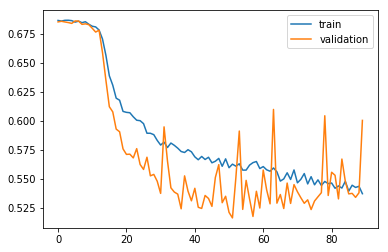

In [ ]:
from matplotlib import pyplot
history=model.fit(X_train,Y_train,batch_size=32,epochs=90,
          validation_split=0.2)
#model.save_weights('./model.h5')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()


In [ ]:
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


1380/1380 [==============================] - 0s 94us/step
Test set
  Loss: 0.644
  Accuracy: 0.669


In [ ]:
hello=model.predict(X_test)
hello[hello<0.53]=0
hello[hello>0.53]=1

In [ ]:
hello


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, hello)
cm

array([[207, 383],
       [ 79, 711]])

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=(4,300))
    layer = LSTM(64)(inputs)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model2 = Model(inputs=inputs,outputs=layer)
    return model2
    
model2 = RNN()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 4, 300)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total para

Train on 6256 samples, validate on 1564 samples
Epoch 1/50
6256/6256 [==============================] - 3s 496us/step - loss: 0.6867 - acc: 0.5635 - val_loss: 0.6843 - val_acc: 0.5665
Epoch 2/50
6256/6256 [==============================] - 2s 342us/step - loss: 0.6855 - acc: 0.5633 - val_loss: 0.6845 - val_acc: 0.5665
Epoch 3/50
6256/6256 [==============================] - 2s 343us/step - loss: 0.6853 - acc: 0.5630 - val_loss: 0.6815 - val_acc: 0.5665
Epoch 4/50
6256/6256 [==============================] - 2s 345us/step - loss: 0.6805 - acc: 0.5630 - val_loss: 0.6763 - val_acc: 0.5639
Epoch 5/50
6256/6256 [==============================] - 2s 342us/step - loss: 0.6741 - acc: 0.5555 - val_loss: 0.6715 - val_acc: 0.5665
Epoch 6/50
6256/6256 [==============================] - 2s 336us/step - loss: 0.6733 - acc: 0.5607 - val_loss: 0.6699 - val_acc: 0.5665
Epoch 7/50
6256/6256 [==============================] - 2s 347us/step - loss: 0.6669 - acc: 0.5559 - val_loss: 0.6568 - val_acc: 0.5665


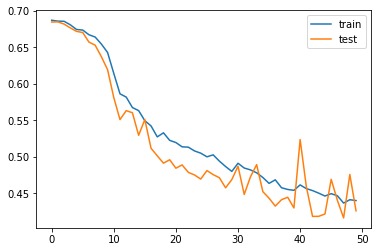

In [ ]:
from matplotlib import pyplot
history=model2.fit(X_train,Y_train,batch_size=32,epochs=50,
          validation_split=0.2)
model2.save_weights('./model.h5')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
accr = model2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


1380/1380 [==============================] - 0s 94us/step
Test set
  Loss: 0.480
  Accuracy: 0.778


In [ ]:
hello2=model2.predict(X_test)
hello2[hello2<0.53]=0
hello2[hello2>0.53]=1

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, hello2)
cm2

array([[362, 228],
       [ 83, 707]])

In [ ]:
liverform = pd.read_csv('Liverpool.csv')
print(liverform.head())


                                                Text
0  Xherdan Shaqiri (Liverpool) takes the free kic...
1  Xherdan Shaqiri (Liverpool) misses a good chan...
2  Trent Alexander-Arnold produces a cross from t...
3  James Milner (Liverpool) sends a teasing cross...
4  It's a goal! Georginio Wijnaldum (Liverpool) m...


In [ ]:

import itertools
alist=list(itertools.product([0, 1, 2],[3,9,11,15],[1,2,3]))

#max(0,monitor[1])
#pre=form.append([envec(liverpoolform.iloc[i,0]),envec(alist[j][0]),envec(alist[j][1]),envec(alist[j][2])])
my_max=[]
maxnum=0
locate=[0,0,0]
track=[]
for i in range(len(liverform)):
    forma=[]
    maxnum=0
    for j in range(len(alist)):
              forma.append([envec(liverform.iloc[i,0]),envec(alist[j][0]),envec(alist[j][1]),envec(alist[j][2])])
              monitor=model.predict(np.array(forma))
              maxnum=0
    for k in range(len(monitor)):
              if(maxnum<monitor[k]):
                  maxnum=max(maxnum,monitor[k])
                  locate=[alist[k][0],alist[k][1],alist[k][2]]
    track.append(locate)

print(track)


[[0, 15, 3], [2, 9, 2], [2, 11, 3], [0, 11, 2], [2, 9, 3], [2, 11, 3], [2, 9, 2], [0, 15, 1], [2, 9, 2], [0, 11, 1], [0, 15, 2], [2, 11, 3], [2, 15, 1], [2, 3, 2], [2, 11, 2], [2, 15, 2], [2, 15, 1]]


In [ ]:

import itertools
alist=list(itertools.product([0, 1, 2],[3,9,11,15],[1,2,3]))

maxnum=0
locate=[0,0,0]
track=[]
for i in range(len(liverform)):
    forma=[]
    maxnum=0
    for j in range(len(alist)):
              forma.append([envec(liverform.iloc[i,0]),envec(alist[j][0]),envec(alist[j][1]),envec(alist[j][2])])
              monitor=model2.predict(np.array(forma))
              maxnum=0
    for k in range(len(monitor)):
              if(maxnum<monitor[k]):
                  maxnum=max(maxnum,monitor[k])
                  locate=[alist[k][0],alist[k][1],alist[k][2]]
    track.append(locate)

print(track)

[[0, 15, 3], [2, 11, 3], [2, 9, 3], [0, 15, 2], [2, 11, 2], [1, 9, 2], [2, 9, 2], [0, 15, 3], [1, 3, 2], [0, 9, 2], [0, 9, 1], [2, 9, 2], [2, 11, 2], [2, 15, 3], [0, 11, 3], [2, 11, 2], [2, 3, 3]]


# **Test on a new game**

In [ ]:

liverform2 = pd.read_csv('Liverpool_Arsenal.csv')
print(liverform2.head())

In [ ]:
maxnum2=0
locate2=[0,0,0]
track2=[]
for i in range(len(liverform2)):
    forma2=[]
    maxnum2=0
    for j in range(len(alist)):
              forma2.append([envec(liverform2.iloc[i,0]),envec(alist[j][0]),envec(alist[j][1]),envec(alist[j][2])])
              monitor2=model.predict(np.array(forma2))
              maxnum2=0
    for k in range(len(monitor)):
              if(maxnum2<monitor[k]):
                  maxnum2=max(maxnum2,monitor2[k])
                  locate2=[alist[k][0],alist[k][1],alist[k][2]]
    track2.append(locate2)